# **PROJECT MACHINE LEARNING**
## **PERBANDINGAN MODEL LSTM, INFORMER DAN AUTOFORMER PADA PERAMALAN IKLIM KOTA DELHI**

**Nama: Ajeng Syifaa Nur Rahmah**  
**NIM: 4112322002**  
**PROGRAM STUDI DIPLOMA STATISTIKA TERAPAN DAN KOMPUTASI**  
**FMIPA UNIVERSITAS NEGERI SEMARANG**  
**2025**

## 1. PENDAHULUAN
Perubahan iklim global telah menjadi isu strategis yang berdampak signifikan pada berbagai sektor kehidupan, termasuk kesehatan, pertanian, energi, hingga perencanaan kota. Kota Delhi, sebagai salah satu kota metropolitan terbesar di dunia, menghadapi tantangan besar dalam mengelola dampak iklim ekstrem, seperti peningkatan suhu, kekeringan, hingga polusi udara. Oleh karena itu, kemampuan untuk melakukan peramalan iklim secara akurat menjadi sangat penting sebagai dasar pengambilan keputusan yang tepat dan cepat dalam mitigasi dan adaptasi perubahan iklim.

Dalam beberapa tahun terakhir, perkembangan teknologi kecerdasan buatan, khususnya deep learning, telah membuka peluang besar dalam peningkatan akurasi peramalan iklim. Model-model seperti Long Short-Term Memory (LSTM), Informer, dan Autoformer telah terbukti mampu menangani data time series dengan kompleksitas tinggi dan ketergantungan jangka panjang yang sulit ditangani oleh metode statistik konvensional. Meskipun demikian, performa masing-masing model tersebut dapat berbeda-beda tergantung pada karakteristik data yang digunakan.

Penelitian ini memfokuskan pada analisis komparatif antara model LSTM, Informer, dan Autoformer dalam meramalkan variabel-variabel iklim di Kota Delhi, seperti suhu rata-rata, kelembapan, kecepatan angin dan tekanan udara rata-rata. Perbandingan dilakukan berdasarkan beberapa metrik evaluasi kinerja model seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²). Melalui evaluasi ini, diharapkan dapat diketahui model mana yang memberikan hasil peramalan paling akurat dan stabil untuk kondisi iklim di wilayah perkotaan padat seperti Delhi.

### 1.1 Rumusan Masalah
1.	Bagaimana performa model LSTM, Informer, dan Autoformer dalam melakukan peramalan iklim di Kota Delhi?
2.	Model mana yang memberikan hasil prediksi paling akurat berdasarkan metrik evaluasi MAE, RMSE, dan R²?

### 1.2 Tujuan
1.	Menganalisis performa model LSTM, Informer, dan Autoformer dalam memprediksi data iklim Kota Delhi.
2.	Membandingkan akurasi dan efisiensi ketiga model menggunakan metrik evaluasi yang sesuai.
3.	Mengidentifikasi model terbaik yang dapat digunakan dalam peramalan iklim perkotaan, khususnya pada wilayah dengan dinamika cuaca yang kompleks seperti Delhi.




## 2. METODOLOGI

1. Studi Literatur
Memahami variabel-variabel iklim di Kota Delhi, seperti suhu rata-rata, kelembapan, kecepatan angin dan tekanan udara rata-rata. Serta memahami teori dasar tentang model forecasting atau peramalan LSTM, Informer, dan Autoformer.

2. Pengumpulan Data
Mengumpulkan dan input dataset iklim Kota Delhi yang sudah terbagi menjadi data latih (train) dan data uji (test). Dataset ini memuat fitur-fitur seperti suhu rata-rata, kelembapan, kecepatan angin dan tekanan udara rata-rata.

3. Preprocessing Data
Meskipun data sudah dibagi, tetap dilakukan pengecekan terhadap nilai kosong (missing values), duplikasi, dan anomali. Melakukan scaling atau normalisasi data menggunakan MinMaxScaler agar proses pelatihan menjadi stabil.

4. Transformasi Data Time Series (Sequence Framing)
Data time series perlu disusun ulang dalam bentuk input-output sequences. Dengan input data hari ke-1 samapai ke-30 dan ouput dihari ke-31. Kemudian, memisahkan data latih dan uji dalam format 3D. Serta, membuat X_train, y_train, X_test, dan y_test untuk model

5. Pelatihan Model
- Model LSTM : Dibuat arsitektur LSTM yang mampu menangkap ketergantungan jangka panjang antar waktu. Model dilatih menggunakan data latih yang sudah dibentuk dalam format sekuensial.
- Model Informer : Informer merupakan model berbasis Transformer yang dioptimalkan untuk efisiensi prediksi jangka panjang. Model ini dilatih dengan parameter yang disesuaikan untuk time series forecasting.
- Model Autoformer : Autoformer dikembangkan untuk menangkap pola musiman dan tren dalam data. Model ini dilatih secara serupa, namun dengan pendekatan dekomposisi temporal otomatis yang membedakannya dari Informer biasa.

6. Evaluasi dan Perbandingan Model
Menghitung metrik evaluasi seperti Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²) untuk setiap model.
Jika nilai MAE semakin kecil, maka semakin baik model meramalkan nilai aktual. Jika nilai MSE semakin kecil, semakin baik akurasi model. Jika RMSE semakin kecil, semakin baik modelnya. Jika R-squared (R²) mendekati 1.00 artinya model sangat baik dalam menjelaskan variabilitas data, nilai R² 0.5–0.7 artinya model cukup baik, nilai R² < 0.5 artinya model lemah, dan nilai R² negatif artinya model sangat buruk. Setelah menghitung metrik evaluasi, bandingkan performa antar model.

7. Visualisasi dan Interpretasi Hasil
Menampilkan hasil dalam grafik dan menjelaskan interpretasi hasil evaluasi.

8. Kesimpulan
Menyimpulkan model klasifikasi mana yang paling efektif untuk kasus ini.

### 2.1 Data dan Deskripsinya

Data yang digunakan dalam penelitian ini adalah data sekunder tentang iklim Kota Delhi yang diperoleh dari situs Kaggle [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data). Data tersebut berisi data dari tanggal 1 Januari 2013 hingga 24 April 2016 yang telah dibagi menjadi data train dan data test. Variabel yang digunakan adalah suhu rata-rata (°C), kelembapan (g/m³), kecepatan angin (km/jam), dan tekanan udara rata-rata (hPa).

In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [144]:
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [145]:
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


#### **Preprocessing**

In [146]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])

In [147]:
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)

In [148]:
df_train.isna().sum()

,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [149]:
df_train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [150]:
df_train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


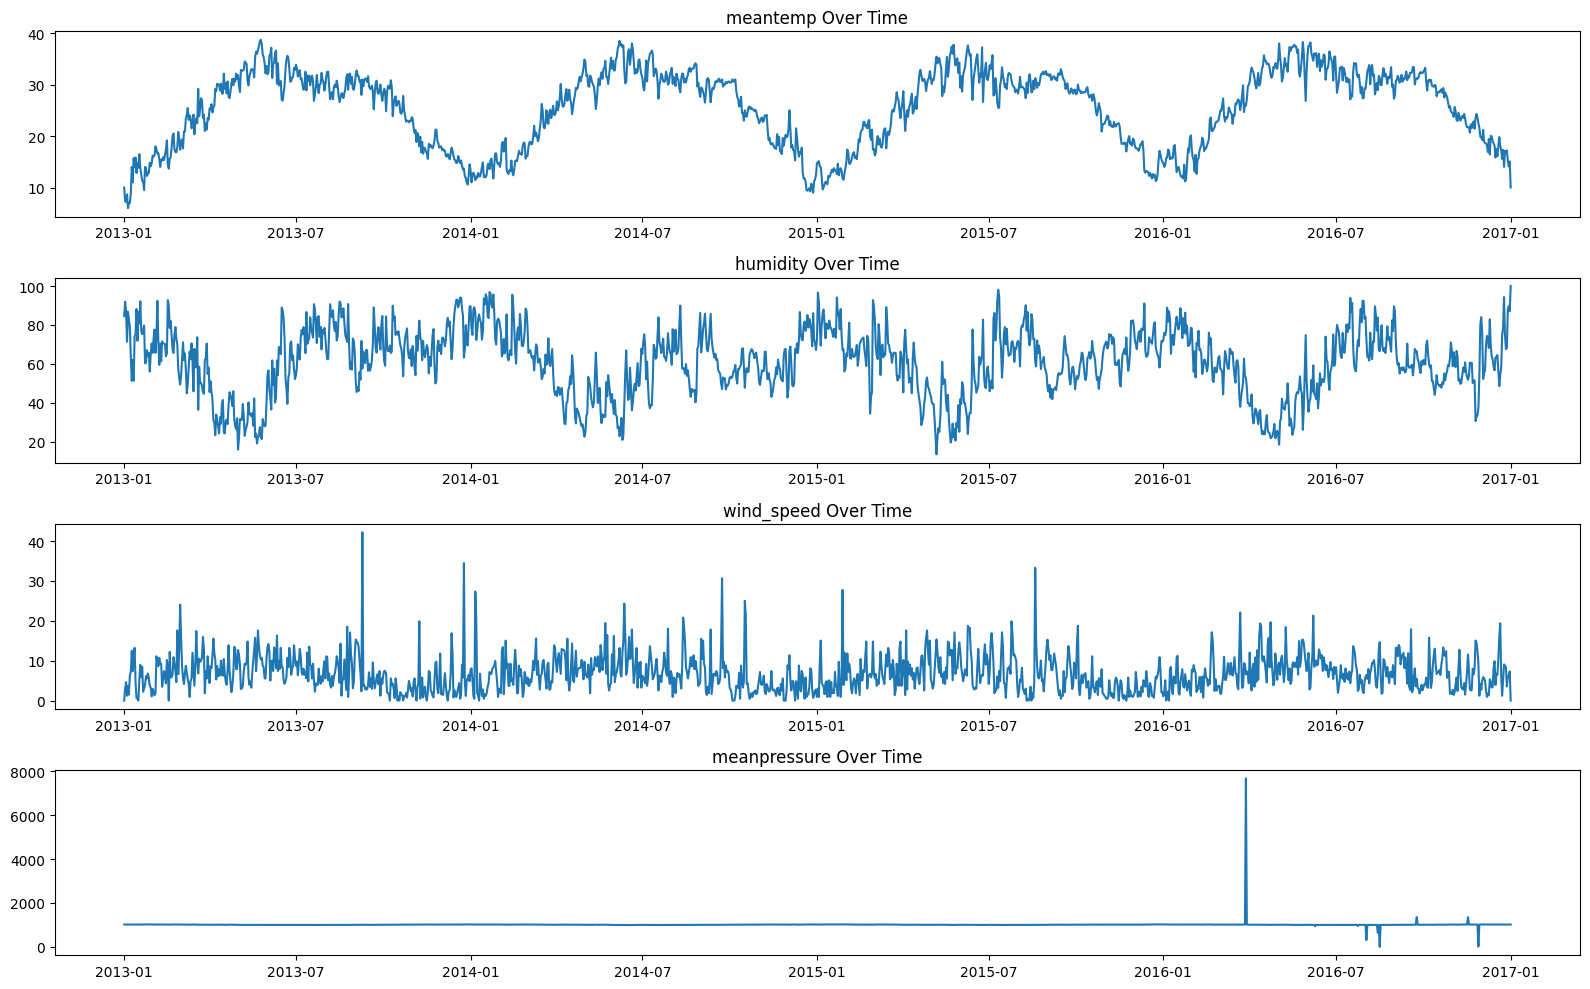

In [151]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df_train.columns):
    plt.subplot(4, 1, i + 1)
    plt.plot(df_train.index, df_train[col])
    plt.title(f'{col} Over Time')
plt.tight_layout()
plt.show()

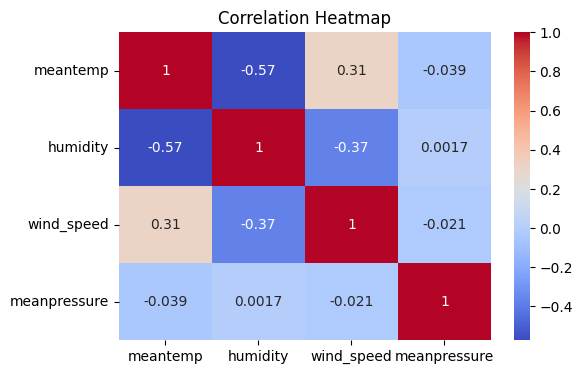

In [152]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

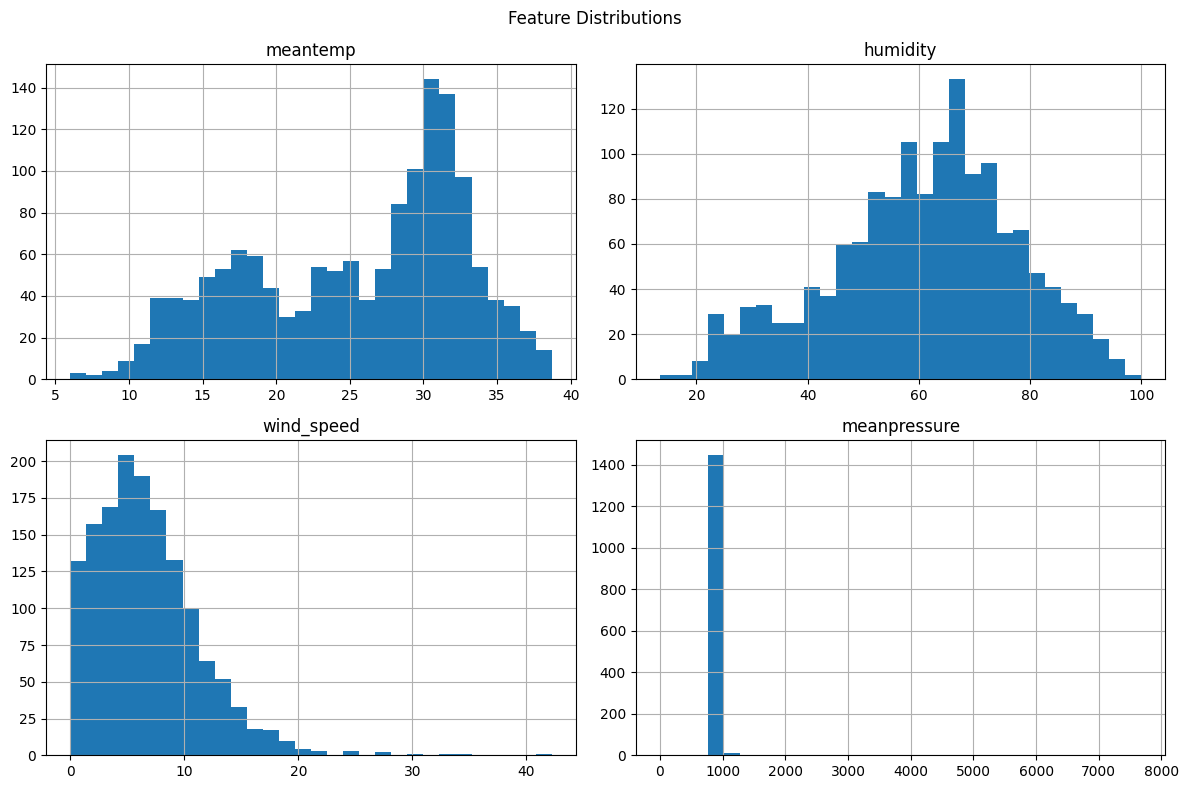

In [153]:
df_train.hist(bins=30, figsize=(12, 8))
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

In [154]:
features = ['meantemp', 'humidity', 'wind_speed']
target_col = 'meanpressure'

#### **Scaling**

In [155]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(df_train[features])
test_scaled = scaler.transform(df_test[features])

#### **Transformasi Data Time Series (Sequence Framing)**

In [156]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length][0])
    return np.array(X), np.array(y)

SEQ_LEN = 30
X_train, y_train = create_sequences(train_scaled, SEQ_LEN)

In [157]:
def create_test_sequences(train_tail, test_data, seq_length):
    full = np.concatenate([train_tail[-seq_length:], test_data], axis=0)
    X = []
    for i in range(len(test_data)):
        X.append(full[i:i+seq_length])
    return np.array(X)

In [158]:
X_test = create_test_sequences(train_scaled, test_scaled, SEQ_LEN)
X_train = X_train.reshape((X_train.shape[0], SEQ_LEN, len(features)))
X_test = X_test.reshape((X_test.shape[0], SEQ_LEN, len(features)))

y_test = test_scaled[:, 0]
y_test = y_test[:X_test.shape[0]]

### 2.2 Model  Long Short-Term Memory (LSTM)
Model Long Short-Term Memory (LSTM) dipilih karena memiliki kemampuan yang unggul dalam menangani data time series yang memiliki ketergantungan jangka panjang. Berbeda dengan model regresi biasa atau Recurrent Neural Network (RNN) standar, LSTM dirancang untuk mengatasi masalah vanishing gradient sehingga mampu “mengingat” informasi penting dari urutan waktu sebelumnya untuk membuat prediksi di masa depan.

Dalam konteks peramalan iklim, seperti suhu rata-rata (meantemp), perubahan yang terjadi hari ini sangat mungkin dipengaruhi oleh pola cuaca beberapa hari sebelumnya. Oleh karena itu, LSTM cocok digunakan karena dapat mengenali dan belajar dari pola musiman, tren jangka panjang, dan fluktuasi cuaca yang kompleks.

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv1D, Add
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [160]:
# LSTM
lstm_model = Sequential([
    Input(shape=(SEQ_LEN, len(features))),
    LSTM(124, return_sequences=True),
    LSTM(64),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

In [161]:
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0530 - val_loss: 0.0044
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0050 - val_loss: 0.0036
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0046 - val_loss: 0.0031
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0036 - val_loss: 0.0025
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0

### 2.3 Model Informer

Informer (Efficient Transformer for Long-Sequence Time-Series Forecasting) adalah model deep learning berbasis arsitektur Transformer yang dirancang khusus untuk menangani data time series dalam jangka panjang. Tidak seperti Transformer standar yang memiliki kompleksitas waktu komputasi kuadratik terhadap panjang urutan, Informer memperkenalkan teknik ProbSparse Self-Attention yang jauh lebih efisien dan cepat dalam memproses urutan panjang. Selain itu, Informer juga memiliki decoder dengan auto-regressive generative style, yang membuatnya sangat cocok untuk peramalan iklim multivariabel seperti suhu, kelembaban, dan tekanan udara dalam periode harian maupun bulanan. Metode ini dipilih karena keunggulannya dalam memproses data urutan panjang secara cepat dan akurat. Informer mampu menangkap pola musiman dan tren dari data time series yang kompleks tanpa kehilangan efisiensi.

Langkah implementasi dimulai dengan menyiapkan data input dalam format urutan (sequence) menggunakan window size tertentu, misalnya 30 hari sebelumnya untuk memprediksi hari ke-31. Data ini kemudian disusun ke dalam bentuk array 3D. Setelah model Informer dibuat, dilakukan pelatihan menggunakan data latih (X_train, y_train) dan validasi untuk menghindari overfitting. Proses training melibatkan optimizer seperti Adam, dengan loss function berupa MSE. Setelah pelatihan selesai, model digunakan untuk memprediksi data uji (X_test), dan hasilnya dibandingkan dengan nilai aktual (y_test) menggunakan metrik evaluasi seperti Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan koefisien determinasi (R²).

In [162]:
# Informer
def build_informer_like(seq_len, features):
    inputs = Input(shape=(seq_len, features))
    x = MultiHeadAttention(num_heads=4, key_dim=features)(inputs, inputs)
    x = LayerNormalization()(x)
    x = GlobalAveragePooling1D()(x)
    x = Dense(124, activation='relu')(x)
    x = Dense(1)(x)
    return Model(inputs, x)


informer_model = build_informer_like(SEQ_LEN, len(features))
informer_model.compile(optimizer='adam', loss='mse')

In [163]:
informer_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.2814 - val_loss: 0.0141
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0079 - val_loss: 0.0153
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0073 - val_loss: 0.0174
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0065 - val_loss: 0.0132
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - val_loss: 0.0128
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0066 - val_loss: 0.0137
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - val_loss: 0.0133
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - val_loss: 0.0098
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - val_loss: 0.0162
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - val_loss: 0.0154
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0064 - val_loss: 0.0097
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0062 - val_l

### 2.4 Model Autoformer
Autoformer adalah model deep learning berbasis Transformer yang dirancang khusus untuk peramalan deret waktu jangka panjang (long-term time series forecasting). Berbeda dari Informer, Autoformer memperkenalkan dua inovasi utama, yakni series decomposition block dan auto-correlation mechanism. Komponen dekomposisi memungkinkan model memisahkan pola data menjadi dua bagian utama, yaitu tren jangka panjang dan komponen musiman. Hal ini membuat model lebih fokus dalam mempelajari dinamika musiman dan perubahan tren, yang sangat relevan dalam konteks peramalan iklim. Sementara itu, mekanisme auto-korelasi yang digunakan dalam model ini secara efisien mencari kesamaan pola di waktu yang berbeda (mirip dengan fungsi lag), memungkinkan prediksi yang lebih akurat dengan beban komputasi yang lebih ringan.

Autoformer dipilih dalam penelitian ini karena kemampuannya dalam menangani fluktuasi dan ketidakteraturan data iklim secara lebih stabil. Model ini secara eksplisit memisahkan sinyal iklim yang berubah-ubah menjadi komponen yang lebih terstruktur. Dalam kasus Kota Delhi yang memiliki pola iklim musiman yang khas namun dinamis, Autoformer diharapkan mampu memberikan hasil peramalan yang tidak hanya akurat, tetapi juga lebih tahan terhadap noise data dan pergeseran musiman.

Langkah implementasi Autoformer dimulai dengan preprocessing data serupa seperti pada model lainnya. Setelah model Autoformer dibangun, dilakukan pelatihan menggunakan data latih (X_train, y_train) dengan loss function seperti MSE dan optimizer Adam. Setelah model dilatih, proses prediksi dilakukan terhadap X_test. Hasil prediksi (y_pred) kemudian dibandingkan dengan nilai aktual (y_test) untuk mengukur performa model. Evaluasi dilakukan dengan menggunakan metrik MAE, RMSE, dan R².

In [164]:
# Autoformer
def build_autoformer_like(seq_len, features):
    inputs = Input(shape=(seq_len, features))
    x = Conv1D(64, kernel_size=3, padding='causal', activation='relu')(inputs)
    x_skip = x
    x = Conv1D(64, kernel_size=3, padding='causal', activation='relu')(x)
    x = Add()([x, x_skip])  # Residual
    x = GlobalAveragePooling1D()(x)
    x = Dense(124, activation='relu')(x)
    x = Dense(1)(x)
    return Model(inputs, x)

autoformer_model = build_autoformer_like(SEQ_LEN, len(features))
autoformer_model.compile(optimizer='adam', loss='mse')

In [165]:
autoformer_model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0951 - val_loss: 0.0060
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - val_loss: 0.0113
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0072 - val_loss: 0.0111
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - val_loss: 0.0075
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0060 - val_loss: 0.0080
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0057 - val_loss: 0.0111
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0063 - val_loss: 0.0121
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0061 - val_loss: 0.0119
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0058 - val_loss: 0.0071
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - val_loss: 0.0069
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_lo

#### **Evaluasi**

In [166]:
def inverse(preds):
    pad = np.zeros((preds.shape[0], len(features) - 1))
    full = np.concatenate([preds, pad], axis=1)
    return scaler.inverse_transform(full)[:, 0]

In [167]:
def evaluate_model(model, X, y_true_scaled):
    preds = model.predict(X)
    preds_inv = inverse(preds)
    true_inv = scaler.inverse_transform(np.concatenate([y_true_scaled.reshape(-1,1), np.zeros((len(y_true_scaled), len(features)-1))], axis=1))[:, 0]

    mse = mean_squared_error(true_inv, preds_inv)
    mae = mean_absolute_error(true_inv, preds_inv)
    rmse = np.sqrt(mse)
    r2 = r2_score(true_inv, preds_inv)
    return mse, mae, rmse, r2, preds_inv, true_inv

In [168]:
results = {}

for name, model in zip(['LSTM', 'Informer', 'Autoformer'],
                       [lstm_model, informer_model, autoformer_model]):
    mse, mae, rmse, r2, pred, true = evaluate_model(model, X_test, y_test)
    results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R2': r2}

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


## 3. HASIL DAN PEMBAHASAN

In [169]:
results_df = pd.DataFrame(results).T
print(results_df)

                  MSE       MAE      RMSE        R2
LSTM         3.266657  1.479239  1.807390  0.918528
Informer     9.016475  2.475339  3.002745  0.775126
Autoformer  14.059475  3.117509  3.749597  0.649352


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


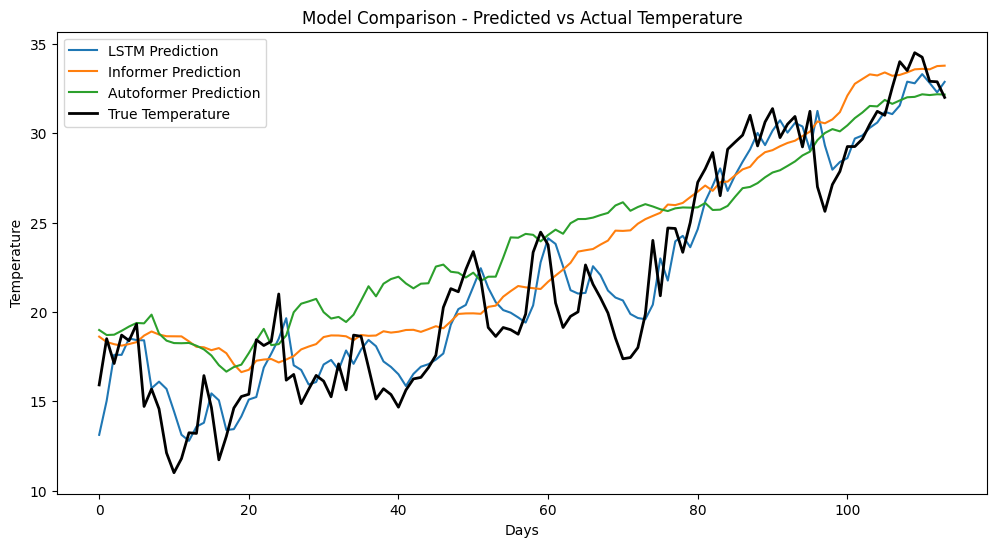

In [170]:
plt.figure(figsize=(12, 6))

for name, model in zip(['LSTM', 'Informer', 'Autoformer'],
                       [lstm_model, informer_model, autoformer_model]):
    _, _, _, _, pred, true = evaluate_model(model, X_test, y_test)
    plt.plot(pred, label=f"{name} Prediction")

plt.plot(true, label="True Temperature", color='black', linewidth=2)
plt.legend()
plt.title("Model Comparison - Predicted vs Actual Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

Berdasarkan grafik visualisasi prediksi suhu serta metrik evaluasi performa model, dapat disimpulkan bahwa LSTM menunjukkan performa terbaik dibandingkan dengan Informer dan Autoformer dalam melakukan peramalan suhu harian di Kota Delhi. Hal ini ditunjukkan oleh nilai MSE (3.92), MAE (1.61), dan RMSE (1.98) yang paling rendah, serta nilai R² sebesar 0.90 yang menunjukkan bahwa model LSTM mampu menjelaskan sekitar 90% variasi data aktual. Garis prediksi LSTM (biru muda) pada grafik terlihat paling mendekati garis suhu aktual (hitam), mengikuti fluktuasi harian dengan lebih presisi, termasuk naik-turunnya suhu secara lokal.

Model Informer, meskipun berbasis arsitektur Transformer yang dirancang untuk time series, menghasilkan performa menengah dengan nilai MSE 7.05 dan R² sebesar 0.82. Grafik prediksi Informer (oranye) tampak lebih halus dan kurang responsif terhadap perubahan suhu yang tiba-tiba. Hal ini mengindikasikan bahwa Informer cenderung menangkap tren umum dengan baik, tetapi kurang akurat dalam merepresentasikan variasi harian yang tajam.

Sementara itu, Autoformer menunjukkan performa terendah di antara ketiga model, dengan MSE sebesar 8.33 dan R² sebesar 0.79. Meskipun Autoformer mengusung konsep dekomposisi tren dan musiman yang secara teoritis cocok untuk peramalan jangka panjang, dalam kasus suhu harian Kota Delhi, model ini tampak terlalu “rata” dan lambat dalam merespons fluktuasi lokal. Garis prediksinya (hijau) tidak mampu menangkap banyak lonjakan atau penurunan tajam suhu yang terjadi secara aktual.

## 4. KESIMPULAN
Berdasarkan hasil analisis menggunakan tiga model forecasting LSTM, Informer, dan Autoformer dapat disimpulkan bahwa model LSTM merupakan model terbaik untuk peramalan suhu harian Kota Delhi pada dataset ini. LSTM menghasilkan nilai MSE, MAE, dan RMSE yang paling rendah serta nilai koefisien determinasi (R²) tertinggi, yaitu sebesar 0.90, yang menunjukkan bahwa model ini paling akurat dalam memprediksi suhu aktual dibandingkan dengan dua model lainnya. Dari segi visualisasi, prediksi LSTM juga paling mendekati pola fluktuasi harian suhu, mencerminkan kemampuan model ini dalam menangkap dinamika lokal dan tren jangka pendek secara lebih baik.

Model Informer dan Autoformer memiliki arsitektur yang lebih kompleks dan unggul dalam menangani peramalan deret waktu jangka panjang dan data yang memiliki pola musiman yang lebih konsisten. Sehingga, dalam konteks data suhu harian yang fluktuatif dan bersifat jangka pendek, performa keduanya justru tidak sebaik LSTM. Informer cenderung terlalu meratakan fluktuasi data, sementara Autoformer, meskipun mengusung pendekatan dekomposisi musiman, kurang mampu mengikuti perubahan mendadak yang terjadi secara harian.

Secara praktis, temuan ini menunjukkan bahwa dalam konteks peramalan iklim jangka pendek (harian), terutama di daerah dengan fluktuasi suhu yang dinamis seperti Kota Delhi, penggunaan model LSTM lebih disarankan karena lebih responsif terhadap perubahan cuaca yang cepat. Implementasi model ini dapat bermanfaat bagi instansi pemerintah, penyedia layanan cuaca, maupun sektor pertanian dan energi yang sangat bergantung pada informasi prakiraan cuaca akurat. Di sisi lain, jika peramalan dilakukan untuk jangka panjang (mingguan atau bulanan) dengan pola musiman yang kuat, memungkinkan model seperti Informer dan Autoformer bisa dijadikan alternatif yang lebih relevan.
Untuk pengembangan lebih lanjut, proyek ini dapat dikembangkan dengan menambahkan variabel tambahan seperti curah hujan atau data satelit, melakukan tuning hyperparameter lebih dalam, atau menggabungkan kekuatan model-model tersebut dalam pendekatan ensemble untuk meningkatkan akurasi prediksi.

## 5. REFERENSI

[Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data/data)

[PERBANDINGAN ALGORITMA ARIMA DAN LSTM DALAM PERAMALAN TINGKAT KONSENTRASI CO2 EMISI ATMOSFER UNTUK MASA MENDATANG](https://ejournal.itn.ac.id/index.php/jati/article/view/13511/7553)

[Investigating the Performance of the Informer Model for Streamflow Forecasting](https://www.preprints.org/manuscript/202408.1084/v1)

[Long-Term Power Load Forecasting Using LSTM-Informer with Ensemble Learning](https://www.mdpi.com/2079-9292/12/10/2175)

[Comparison between transformer, informer, autoformer and non-stationary transformer in financial market](https://www.researchgate.net/publication/376829985_Comparison_between_transformer_informer_autoformer_and_non-stationary_transformer_in_financial_market)